In [2]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import torch
import pandas as pd
import os
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm import tqdm  # Import tqdm for progress bar
import seaborn as sns
from pymor.algorithms.ei import deim
from pymor.vectorarrays.numpy import NumpyVectorSpace
import random

In [3]:
def set_seed(seed=42):
    torch.manual_seed(seed)             # CPU随机性
    torch.cuda.manual_seed(seed)        # GPU随机性（单卡）
    torch.cuda.manual_seed_all(seed)    # GPU随机性（多卡）
    np.random.seed(seed)                # NumPy随机性
    random.seed(seed)                   # Python随机性
    torch.backends.cudnn.deterministic = True  # 固定卷积算法
    torch.backends.cudnn.benchmark = False     # 禁止自动寻找最优算法（为了可重复性）

In [4]:
set_seed(41)
Xp = np.empty((0,512))
y = np.empty((0,1))
dir = "/home/yuqster/files/research/dataset"
mat_data_path = ["/data10", "/vinegar2", "/jelow0"]
index = 0
for mat_data_path_index in mat_data_path[:]:
    while os.path.exists(f"{dir}{mat_data_path_index}/test{index},0mm.csv"):
        file_path = f"{dir}{mat_data_path_index}/test{index},0mm.csv"
        if mat_data_path_index == '/data10':
            data = pd.read_csv(file_path,usecols=[1])
        else:
            data = pd.read_csv(file_path)
        trans = np.array(data.values[:,0])
        trans = trans.reshape(1,-1)
        Xp = np.append(Xp, trans, axis=0)
        y = np.append(y, [[0]], axis=0)
        index += 1
        print(mat_data_path_index)
    else:
        index = 0

print(Xp.shape) 
print(y.shape)

/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10
/data10


In [5]:
for mat_data_path_index, category_index in zip(mat_data_path,range(1,4)):
    for mm_index in range(2,6):
        while os.path.exists(f"{dir}{mat_data_path_index}/test{index},{2*mm_index}mm.csv"):
            file_path = f"{dir}{mat_data_path_index}/test{index},{2*mm_index}mm.csv"
            if mat_data_path_index == '/data10':
                data = pd.read_csv(file_path,usecols=[1])
            else:
                data = pd.read_csv(file_path)
            trans = np.array(data.values[:,0])
            trans = trans.reshape(1,-1)
            Xp = np.append(Xp, trans, axis=0)
            y = np.append(y, [[category_index]], axis=0)
            index += 1
        else:
            index = 0

In [6]:
print(Xp.shape)
print(y.shape)
print(y)

(27028, 512)
(27028, 1)
[[0.]
 [0.]
 [0.]
 ...
 [3.]
 [3.]
 [3.]]


In [7]:
def DEIM(Ur):

    # 假设 Ur 的形状为 (n, r)，每列是一个 POD 模态
    space = NumpyVectorSpace(Ur.shape[0])
    Ur_vectors = space.from_numpy(Ur.T)  # 注意转置：每列作为 basis 模态

    # 使用 deim 得到插值数据（返回值可能包含三个元素）
    P, _, _ = deim(Ur_vectors)

    return P

In [8]:
U,S,Vt = linalg.svd(Xp,full_matrices=False)
V = Vt.T
sigma = np.diag(S)

In [9]:
p = DEIM(V[:,0:10])
X = Xp[:,p]

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

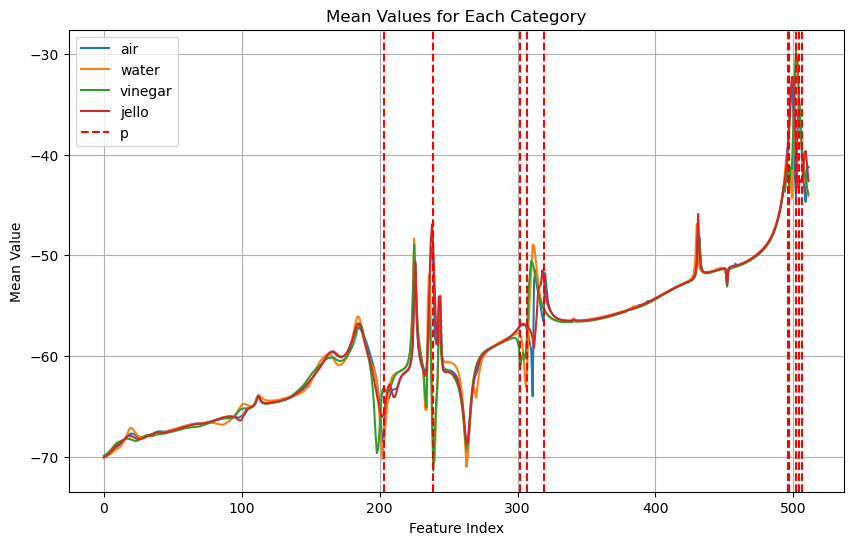

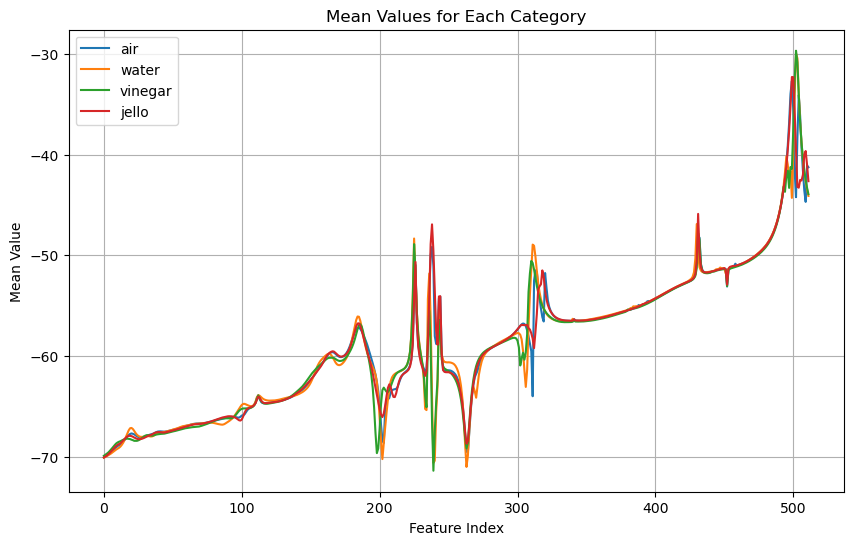

In [10]:
# 计算每个类别的均值并绘制曲线图
materials = ["air", "water", "vinegar", "jello"]
unique_labels = np.unique(y)
plt.figure(figsize=(10,6))
for label in unique_labels:
    # 获取当前类别下的样本索引
    indices = np.where(y.flatten() == label)[0]
    # 计算当前类别 X 中所有样本的特征均值（按列均值）
    mean_values = Xp[indices].mean(axis=0)
    # 绘制均值曲线
    plt.plot(mean_values, label=f"{materials[int(label)]}")
for i, value in enumerate(p):
    if i == 0:
        plt.axvline(x=value, color='red', linestyle='--', label='p')
    else:
        plt.axvline(x=value, color='red', linestyle='--')
plt.xlabel("Feature Index")
plt.ylabel("Mean Value")
plt.title("Mean Values for Each Category")
plt.legend()
plt.grid(True)
plt.show()
# 计算每个类别的均值并绘制曲线图
materials = ["air", "water", "vinegar", "jello"]
unique_labels = np.unique(y)
plt.figure(figsize=(10,6))
for label in unique_labels:
    # 获取当前类别下的样本索引
    indices = np.where(y.flatten() == label)[0]
    # 计算当前类别 X 中所有样本的特征均值（按列均值）
    mean_values = Xp[indices].mean(axis=0)
    # 绘制均值曲线
    plt.plot(mean_values, label=f"{materials[int(label)]}")
plt.xlabel("Feature Index")
plt.ylabel("Mean Value")
plt.title("Mean Values for Each Category")
plt.legend()
plt.grid(True)
plt.show()

(512, 512)
(27028, 10)
(27028, 512)
(512,)
(512,)


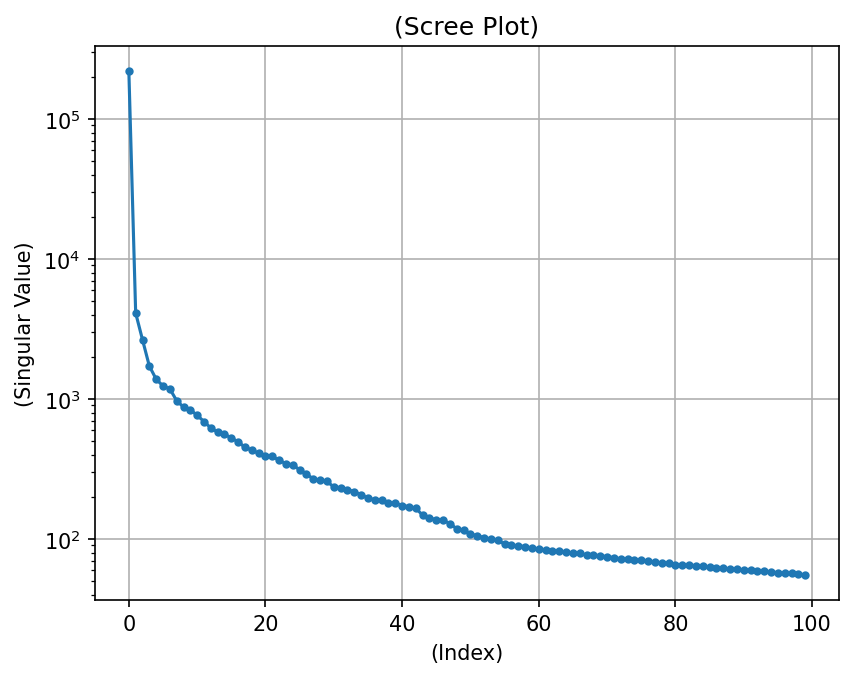

<function matplotlib.pyplot.show(close=None, block=None)>

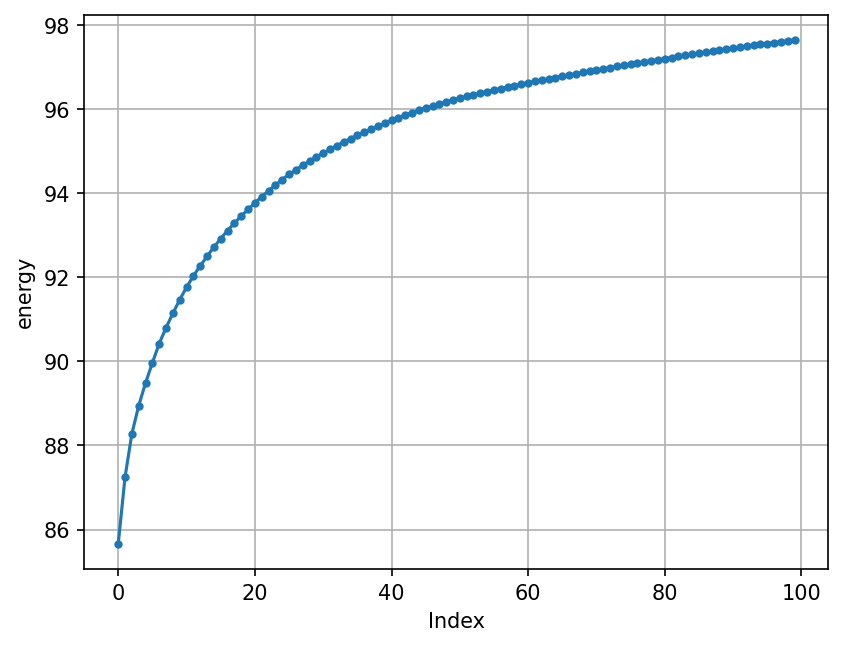

In [11]:
print(V.shape)
print(X.shape)
energy = np.cumsum(S)/np.sum(S)*100
print(U.shape)
print(S.shape)
print(energy.shape)
plt.figure(dpi=150)
# semilogy：x 轴线性，y 轴对数
plt.semilogy( S[:100],
             marker='o',
             linestyle='-',
             markersize=3)
plt.xlabel("(Index)")
plt.ylabel("(Singular Value)")
plt.title("(Scree Plot)")
plt.grid(True)
plt.show()
plt.figure(dpi=150)
plt.plot(energy[0:100],marker = 'o',linestyle='-',markersize = 3)
plt.xlabel('Index')
plt.ylabel('energy')
plt.grid(True)
plt.show

In [12]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print(f"Using device: {device}")

Using device: cpu


In [13]:
# Standardize the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scaler = MinMaxScaler(feature_range=(0, 3))
y_test = scaler.fit_transform(y_test)
y_train = scaler.fit_transform(y_train)
print(y_train)

[[1.]
 [2.]
 [1.]
 ...
 [0.]
 [2.]
 [3.]]


In [14]:
class ANN_Model(nn.Module):

    def __init__(self):
        super(ANN_Model, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 6)
        self.fc4 = nn.Linear(6, 4)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [15]:
model = ANN_Model().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

# 4. 将 numpy 数据转为 torch 张量并移动到 device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

In [16]:
# 5. 训练模型
num_epochs = 10000
train_losses = []

# Convert y_train_tensor to the correct type
y_train_tensor = y_train_tensor.squeeze().long() # Remove extra dimension and convert to long
pbar = tqdm(range(num_epochs), desc="Training", leave=True)
for epoch in pbar:
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    pbar.set_postfix(loss=loss.item())

Training: 100%|██████████| 10000/10000 [00:27<00:00, 368.32it/s, loss=0.0103]


In [17]:
# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    train_outputs = model(X_train_tensor)
    _, predicted = torch.max(test_outputs, 1)
    _, predicted_train = torch.max(train_outputs, 1)
    predicted_np = predicted.cpu().numpy()
    predicted_np_train = predicted_train.cpu().numpy()
    accuracy_train = accuracy_score(y_train,predicted_np_train)
    accuracy = accuracy_score(y_test, predicted_np)
    cm = confusion_matrix(y_test, predicted_np)

Accuracy: 0.9934640522875817
Accuracy_train: 0.9965643004387124
Confusion Matrix:
[[1582    0    0   33]
 [   0 1360    0    0]
 [   3    0 2566    4]
 [   8    0    5 2548]]


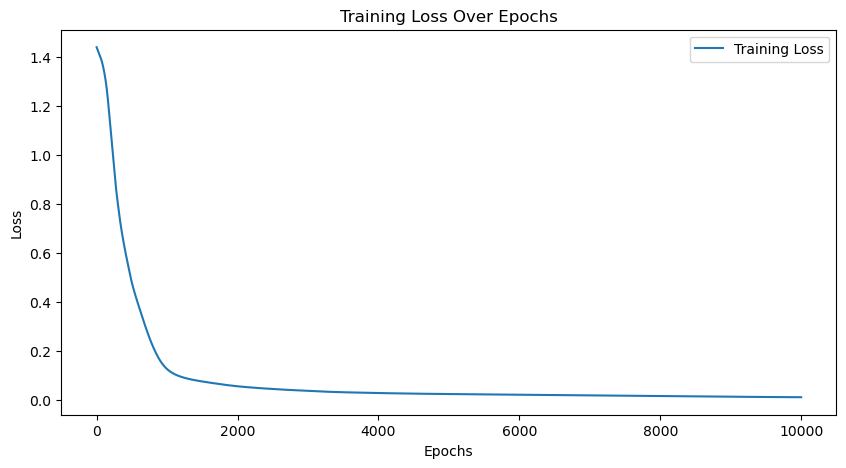

In [18]:
print(f'Accuracy: {accuracy}')
print(f'Accuracy_train: {accuracy_train}')
print(f'Confusion Matrix:\n{cm}')

# 7. 可视化训练损失
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

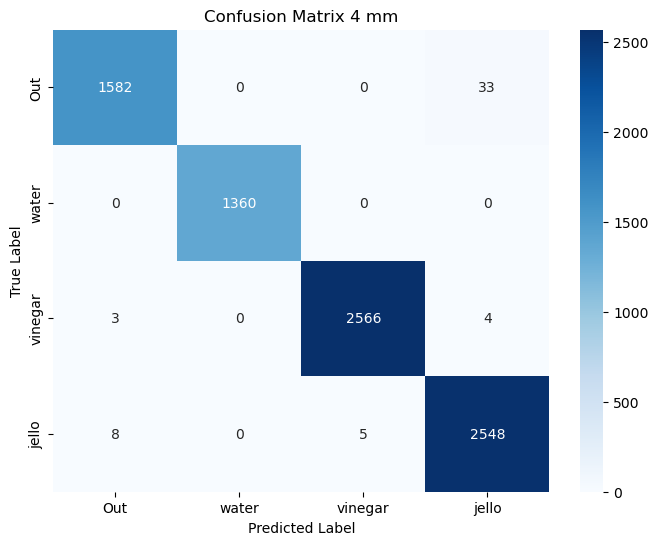

Accuracy: 0.9934640522875817
              precision    recall  f1-score   support

         Out       0.99      0.98      0.99      1615
       water       1.00      1.00      1.00      1360
     vinegar       1.00      1.00      1.00      2573
       jello       0.99      0.99      0.99      2561

    accuracy                           0.99      8109
   macro avg       0.99      0.99      0.99      8109
weighted avg       0.99      0.99      0.99      8109



In [19]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Out", "water", "vinegar", "jello"],
            yticklabels=["Out", "water", "vinegar", "jello"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix {4} mm")
plt.show()

# Convert y_test to integer labels
y_test_int = y_test.astype(int)

# Show classification reportaccuracy
report = classification_report(y_test_int, predicted_np,
                               target_names=["Out", "water", "vinegar", "jello"], labels=[0, 1, 2, 3])
print("Accuracy:", accuracy)
print(report)

In [20]:
# 获取模型的权重字典
weight = model.state_dict()  # 需要加上括号调用方法

# 打印 fc1 层的权重
print(weight['fc1.weight'])


tensor([[-0.2561, -1.3471,  0.8720,  0.1213, -0.0168,  1.4704, -0.8716,  0.2974,
         -0.9222,  0.3999],
        [-0.1761,  0.7927,  1.7762, -1.0800, -0.0452,  0.0253,  0.4049, -0.3528,
          0.3224,  0.1960],
        [ 0.1443,  0.7792, -0.3711,  1.3869,  0.9655,  0.4840, -0.2312,  1.2329,
         -0.6720,  0.5575],
        [ 0.0192, -0.3415, -0.0063,  0.4735,  0.8781,  0.1004, -0.4512, -0.0464,
         -0.4122, -0.6292],
        [-0.4266, -1.1529,  0.3570,  0.3280,  1.0880,  0.5394,  0.2961, -0.3175,
          0.2691,  0.5143],
        [-0.0802,  0.0921,  0.0484, -1.4625,  1.2192, -0.1073,  1.6362, -0.5920,
          0.2334,  0.8726],
        [-0.3444, -1.6541, -1.1464, -0.0210, -0.1913, -0.5211,  1.6628,  0.8098,
          0.3165,  0.3340],
        [ 0.3986,  1.0551, -0.7945,  0.5112, -0.2297,  0.1583, -0.6466,  2.0525,
         -0.4446, -0.9194],
        [ 0.3269,  0.7653,  1.1496, -0.1298, -0.3755, -0.8383, -0.0790,  0.0242,
          1.2380,  1.2091],
        [ 0.5207, -